In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import neural_network
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

df = pd.read_csv('features.csv')

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image
from IPython.display import Image
from wordcloud import WordCloud, STOPWORDS

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22770 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


In [3]:
df.nunique()

Rating                  41
Company Name         11261
Job Title             1080
Salary                 316
Salaries Reported       82
Location                10
Employment Status        4
Job Roles               11
dtype: int64

In [4]:
print("Highest Salary:", round(df["Salary"].max()))
print("Lowest Salary:", round(df["Salary"].min()))

Highest Salary: 90000000
Lowest Salary: 2112


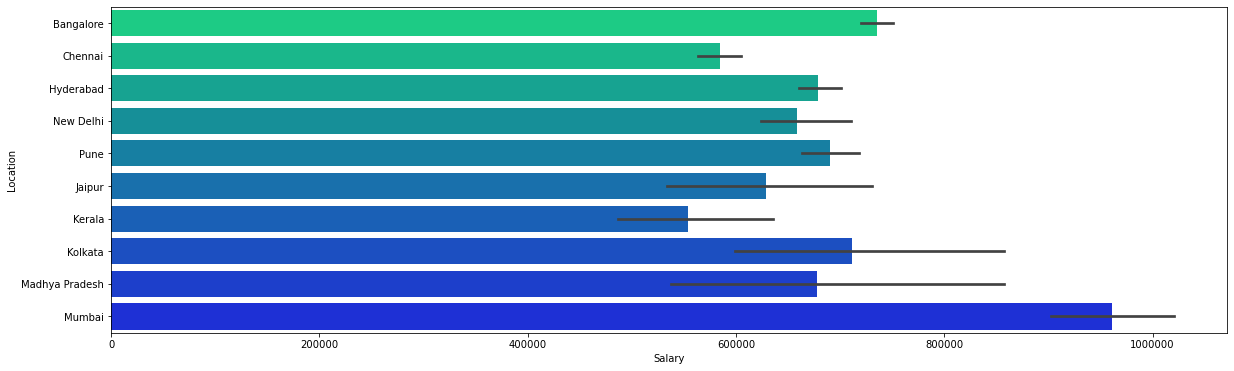

In [5]:
plt.figure(figsize = (20, 6))
plt.ticklabel_format(style = 'plain')
sns.barplot(x = df["Salary"], y = df["Location"], palette = "winter_r");

##plotting location wise salaries

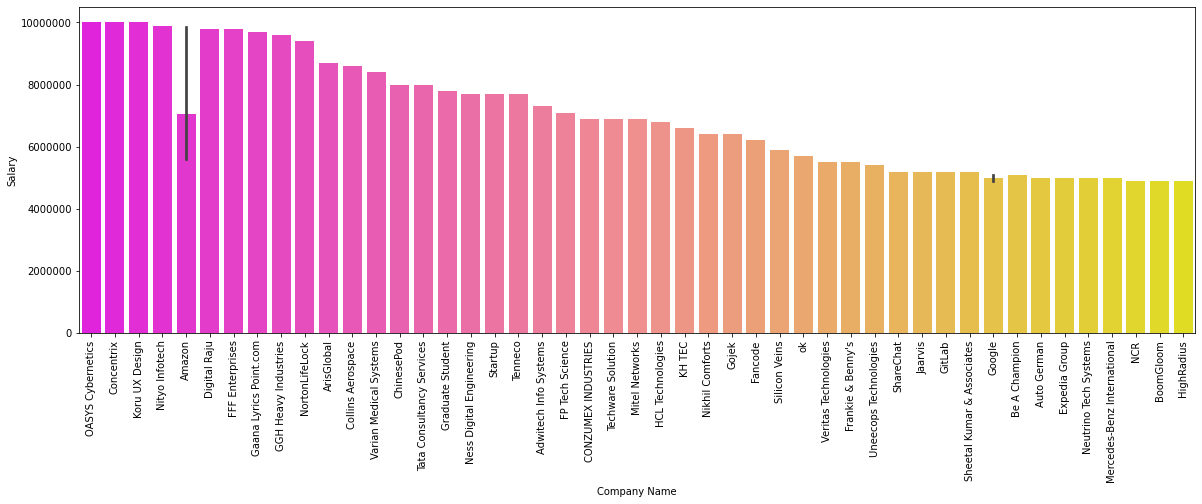

In [6]:
plt.figure(figsize = (20, 6))
plt.xticks(rotation = 90)
plt.ticklabel_format(style = 'plain')
df.sort_values("Salary", axis = 0, ascending = False, inplace = True)
sns.barplot(x = df["Company Name"][1:51],y = df["Salary"][1:51],palette = "spring");

##plotting Company Wise Salaries

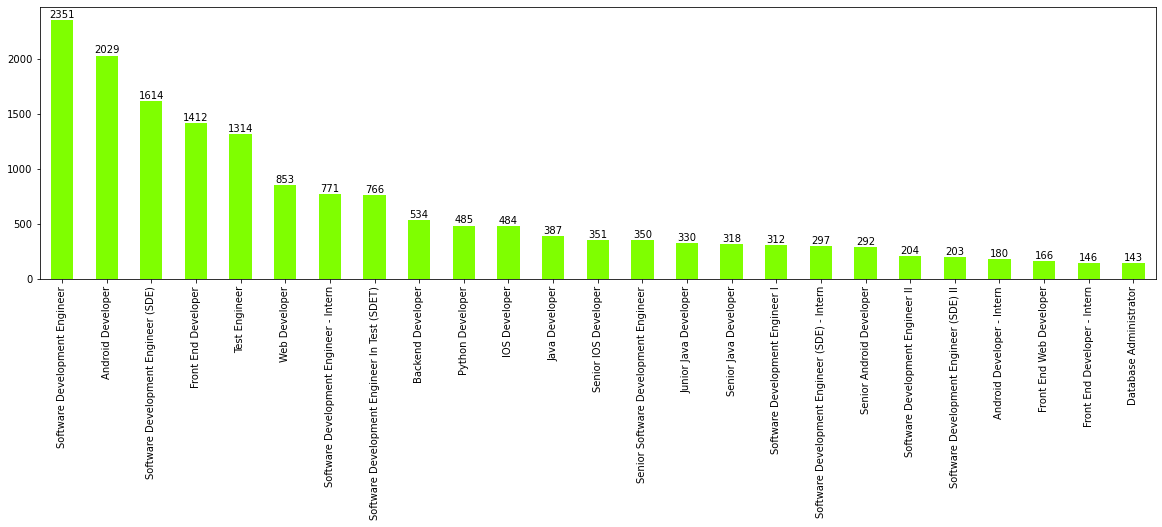

In [7]:
plt.figure(figsize = (20, 5))
ax = df["Job Title"].value_counts()[:25].plot(kind = 'bar',color = "chartreuse")

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    
##plotting Job Title wise salaries

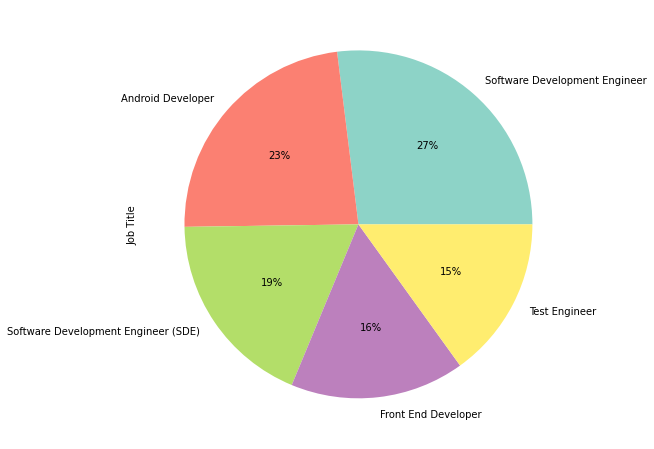

In [8]:
plt.figure(figsize=(10,8))
df['Job Title'].value_counts().head(5).plot(kind='pie', autopct='%.0f%%', colormap="Set3")
plt.show()

##plotting top 5 job titles

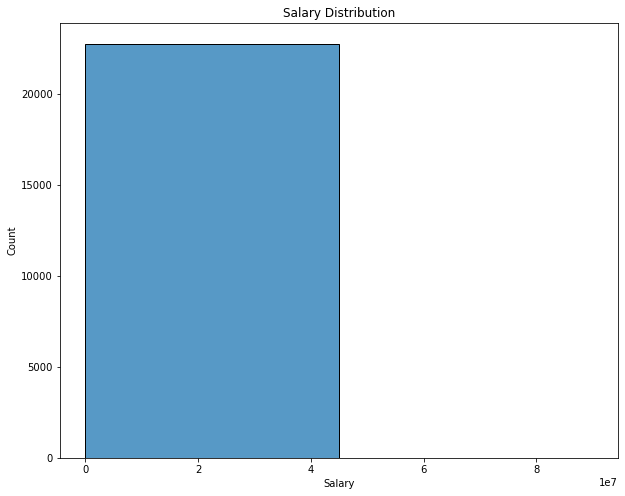

In [9]:
plt.figure(figsize=(10,8))
plt.title('Salary Distribution')
sns.histplot(df['Salary'], palette="colors", bins=2)
plt.show()

##plotting salary distribution

In [10]:
df["Job Roles"].value_counts()

##count of job roles

SDE         8183
Android     2945
Frontend    2163
Java        1858
Testing     1740
IOS         1631
Backend     1194
Web          999
Python       947
Database     865
Mobile       245
Name: Job Roles, dtype: int64

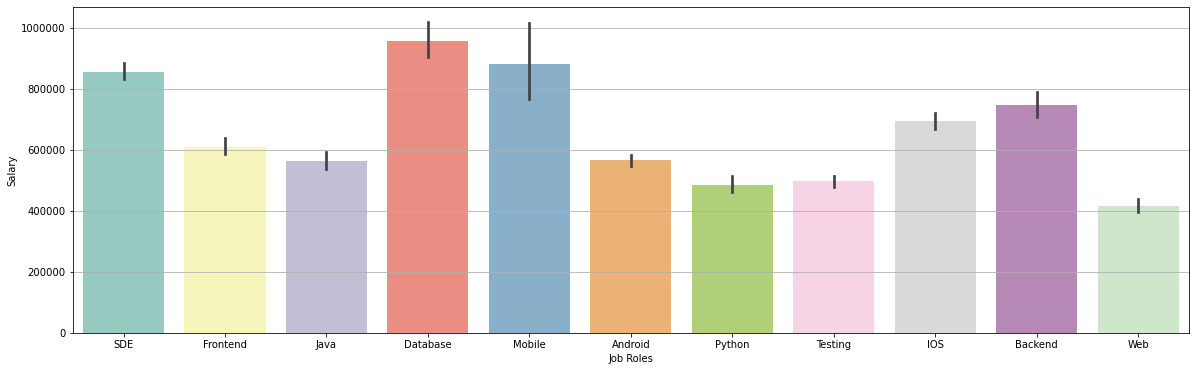

In [11]:
plt.figure(figsize = (20, 6))
plt.grid()
plt.ticklabel_format(style = 'plain')
df.sort_values("Salary", axis = 0, ascending = False, inplace = True)
sns.barplot(x = df["Job Roles"], y = df["Salary"], palette = "Set3");

##plotting salary given to different jobs

In [12]:
le = preprocessing.LabelEncoder()
df['Job Title'] = le.fit_transform(df['Job Title'])
#df['Salaries Reported'] = le.fit_transform(df['Salaries Reported'])

X = df[['Job Title']] # use more number of rows for more training 
Y = df['Salaries Reported'] # use more number of rows for more training 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

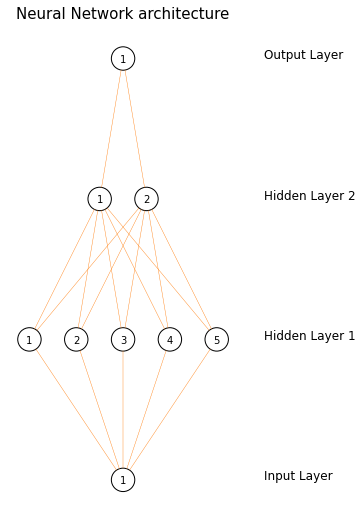

In [22]:
import VisualizeNN as VisNN
network=VisNN.DrawNN([1,5,2,1])
network.draw()

In [23]:
model = neural_network.MLPClassifier(alpha=0.1, activation='logistic',hidden_layer_sizes=(5,2), solver='lbfgs', random_state=18,learning_rate="invscaling")
model.fit(x_train,y_train)

"""bfgs — Stands for Limited-memory Broyden_Fletcher_Goldfarb_Shanno. 
It approximates the second derivative matrix updates with gradient evaluations. 
It stores only the last few updates, so it saves memory. 
It isn't super fast with large data sets. 
It will be the default solver as of Scikit-learn version"""

ypred=model.predict(x_test)
accuracy_score(y_test,ypred)

0.8039086517347387

In [16]:
import scikitplot.estimators as esti
import matplotlib.pyplot as plt

clf = neural_network.MLPClassifier(hidden_layer_sizes=(1,2),random_state=5,verbose=True,learning_rate_init=0.1)
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
accuracy_score(y_test,pred)

Iteration 1, loss = 1.11754216
Iteration 2, loss = 0.87316359
Iteration 3, loss = 0.87367257
Iteration 4, loss = 0.87367899
Iteration 5, loss = 0.87327757
Iteration 6, loss = 0.87376592
Iteration 7, loss = 0.87609478
Iteration 8, loss = 0.87384271
Iteration 9, loss = 0.87424867
Iteration 10, loss = 0.87423190
Iteration 11, loss = 0.87385167
Iteration 12, loss = 0.87346207
Iteration 13, loss = 0.87471866
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


0.8039086517347387